# P/E ratio and Stock Market return

This project's goal is to show the close relationship between P/E ratios in a given year and the return in the next 10 years from that given year.
This data set consists of monthly stock price, dividends, and earnings data and the consumer price index (to allow conversion to real values), all starting January 1881.

Stock price data are monthly averages of daily closing prices.

I am using a Data set from Robert J. Shiller. http://www.econ.yale.edu/~shiller/data.htm.

Emanuele Corà

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_excel("ie_data.xls", sheet_name="Data", encoding="utf-8")

In [3]:
df.columns = ["Date", "Price", "Dividends", "Earnings", "CPI", "Date Fraction", "Long Interest Rate GS10", 
              "Real price", "Real Dividend", "Real Total Return Price", "Real Earnings", "Real TR Scaled Earnings", 
             "CAPE ratio", "NAN1", "TR CAPE ratio", "NAN2"]

In [4]:
df = df[["Date", "Price", "Dividends", "Earnings", "Long Interest Rate GS10", "CAPE ratio"]]

In [5]:
df.dropna(inplace=True)

In [6]:
df.drop([6], inplace=True)

In [7]:
df

,Date,Price,Dividends,Earnings,Long Interest Rate GS10,CAPE ratio
127,1881.01,6.19,0.265,0.4858,3.7,18.474
128,1881.02,6.17,0.27,0.4817,3.69333,18.1473
129,1881.03,6.24,0.275,0.4775,3.68667,18.2701
130,1881.04,6.22,0.28,0.4733,3.68,17.9501
131,1881.05,6.5,0.285,0.4692,3.67333,18.8697
...,...,...,...,...,...,...
1796,2020.02,3277.31,59.1337,124.043,1.5,30.7297
1797,2020.03,2652.39,59.5806,116.33,0.87,24.8172
1798,2020.04,2761.98,59.6137,110.083,0.66,25.9274
1799,2020.05,2919.61,59.6469,103.103,0.67,27.3296


In [8]:
df["P/E ratio"] = df["Price"] / df["Earnings"]

In [9]:
df['Date'] = df['Date'].astype(str)

In [10]:
df["len"] = df["Date"].apply(len)
df["Date"] = df["Date"].where(df["len"] == 7, df["Date"] + "0")

In [11]:
df.drop(columns="len", inplace=True)

In [12]:
print(df.shape)
df.head()

(1674, 7)


,Date,Price,Dividends,Earnings,Long Interest Rate GS10,CAPE ratio,P/E ratio
127,1881.01,6.19,0.265,0.4858,3.7,18.474,12.7419
128,1881.02,6.17,0.27,0.4817,3.69333,18.1473,12.8088
129,1881.03,6.24,0.275,0.4775,3.68667,18.2701,13.0681
130,1881.04,6.22,0.28,0.4733,3.68,17.9501,13.1418
131,1881.05,6.5,0.285,0.4692,3.67333,18.8697,13.8534


In [13]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y.%m')
df = df.set_index("Date")

In [14]:
df30y = df.tail(366)
df_ = df.head(1674-366)

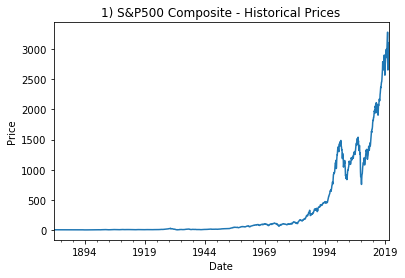

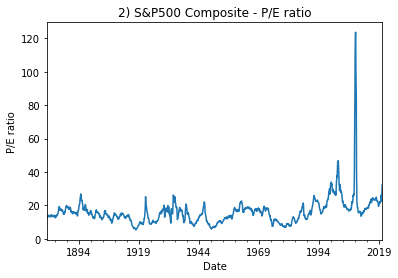

The average P/E ratio for stocks in the S&P500 has been:  16.123217668551018
The average P/E ratio (1881-1990):  13.834232941121705
The average P/E ratio (1990-2020):  24.303523743626197


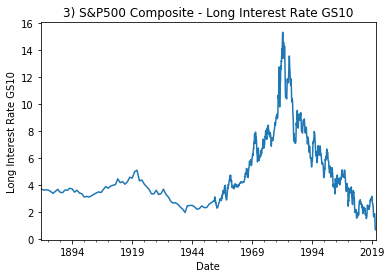

The highest level in Long Interest Rates GS10 is  15.32  in  [datetime.date(1981, 9, 1)]


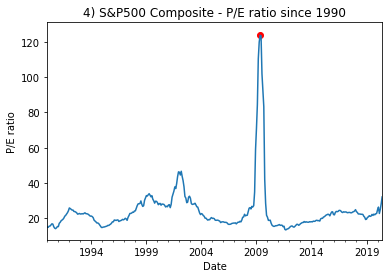

The highest P/E ratio in the last 30 years is:  123.73080438756855  in [datetime.date(2009, 5, 1)]


In [15]:
df["Price"].plot()
plt.title("1) S&P500 Composite - Historical Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()
df["P/E ratio"].plot()
plt.title("2) S&P500 Composite - P/E ratio")
plt.xlabel("Date")
plt.ylabel("P/E ratio")
plt.show()
pe_avg = df["P/E ratio"].mean()
print("The average P/E ratio for stocks in the S&P500 has been: ", pe_avg)
print("The average P/E ratio (1881-1990): ", df_["P/E ratio"].mean())
print("The average P/E ratio (1990-2020): ", df30y["P/E ratio"].mean())
df["Long Interest Rate GS10"].plot()
plt.title("3) S&P500 Composite - Long Interest Rate GS10")
plt.xlabel("Date")
plt.ylabel("Long Interest Rate GS10")
plt.show()
interest_rates_max = df["Long Interest Rate GS10"].max()
print("The highest level in Long Interest Rates GS10 is ", 
      interest_rates_max, " in " ,
      df.index.date[df["Long Interest Rate GS10"] == interest_rates_max])

thirty_year_max = df30y["P/E ratio"].max()
date_30y_max = df30y.index.date[df30y["P/E ratio"] == thirty_year_max]
df30y["P/E ratio"].plot()
plt.scatter(date_30y_max, thirty_year_max, color="red")
plt.title("4) S&P500 Composite - P/E ratio since 1990")
plt.xlabel("Date")
plt.ylabel("P/E ratio")
plt.show()
print("The highest P/E ratio in the last 30 years is: ", thirty_year_max, " in",
      date_30y_max)

The image 1) shows the historical S&P500 Composite's prices since 1881. We can see in the last 30 years there were 3 bull markets and 2 market crashes during the dot-com bubble in early 2000s and the financial crisis in 2008.

The second image shows P/E ratio of the S&P500 in the same time period. The P/E ratio is equal to the price divided by the TTM (trailing-twelve-months) earnings and can be used by investors to understand whether a stock or the entire market is or is not overvalued.
For example, a above average S&P500, P/E ratio may indicate that the market is overvalued. Instead, when P/E ratio is below average, the market might be undervalued. 
We cannot consider P/E ratio as an absolute metric because the market is influenced heavily by other factors.
Interest rates can help us understand the reason why P/E ratio in the last 30 years has been usually higher than the previous P/E ratios (The average P/E ratio from 1881 to 1990 had been 13.8 while from 1990 to 2020 has been 24.3).
Interest rates peaked in 1981 and had been decreasing steadily until 2020 when they hit almost 0. But, what does interest rates mean for stocks? 
When the interest are lower, future cash flow are discounted with a lower discount rate to find the present value of those future cash flows. That makes future cash flows more valuable. In 2020 we have interest rates near to 0, which means that the risk-free rate (10 year treasury bond's yield) is almost 0, which means the discount rate is equal to the risk premium.
If there is no return in Tresury Bonds (or a negative real return) investors have to invest in equity. That could cause high valuation like the one we are seeing in the last 30 years.

P/E ratio is not the better metrics to use to evaluate the market. We can see that the highest P/E ratio in the last 30 years has been in 2009 at a ratio of 123. The markets seem to be extremely overvalued but, instead, it was just the beginning of one of the greatest bull markets in history that last until March 2020, when the market crashed due to Covid-19 pandemic.

Another metric has performed better than P/E ratio. This metric is the CAPE ratio.

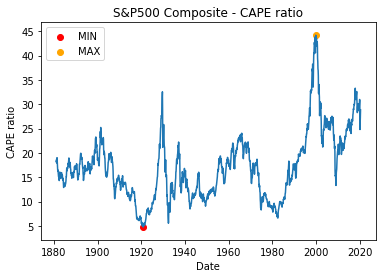

The CAPE ratio was at its lows in [datetime.date(1920, 12, 1)]  at  4.7842410450832515
The CAPE ratio was at its lows in [datetime.date(1999, 12, 1)]  at  44.19793976104054
In 1929 the market peaked at 32.563788598776696


In [16]:
fig, ax = plt.subplots()

min_ = df["CAPE ratio"].min()
date_min = df.index.date[df["CAPE ratio"] == min_]
max_ = df["CAPE ratio"].max()
date_max = df.index.date[df["CAPE ratio"] == max_]
crash_29_max = df["CAPE ratio"].where((df.index.year == 1929)).max()

ax.plot(df["CAPE ratio"])
ax.scatter(date_min, min_, color="red", label="MIN")
ax.scatter(date_max, max_, color="orange", label="MAX")
plt.title("S&P500 Composite - CAPE ratio")
plt.xlabel("Date")
plt.ylabel("CAPE ratio")
ax.legend()
plt.show()
print("The CAPE ratio was at its lows in", date_min, " at ", min_)
print("The CAPE ratio was at its lows in", date_max, " at ", max_)
print("In 1929 the market peaked at", crash_29_max)

The CAPE ratio or Cyclically Adjusted P/E ratio was popularized by Robert J. Shiller at the Yale University because it predicted with accuracy whether the market was overvalued or not.
The CAPE ratio is equal to P/E ratio but it uses real earnings per share(adjusted for inflation) over a ten year period, in order to smooth out fluctuation in profit that occurs in the business cycle.
When the CAPE ratio is high (for example, in 1929, 2000) it means that the market is overvalued. Instead when the CAPE ratio is low, the market is undervalued.
The CAPE ratio predicted the second greatest bull market in history that ended in 1929 when CAPE ratio peaked at 32.5.
In the early 1980s the market started his greated bull market that lasted until 2000 when the market crashed after the dot-com bubble that brought CAPE ratio at an insane level of 44.2 in 1999.
As we can see CAPE ratio performed very well at evaluating the market.

In [17]:
df["Year"] = df.index.year

In [18]:
df.head()

,Price,Dividends,Earnings,Long Interest Rate GS10,CAPE ratio,P/E ratio,Year
Date,,,,,,,
1881-01-01,6.19,0.265,0.4858,3.7,18.474,12.7419,1881
1881-02-01,6.17,0.27,0.4817,3.69333,18.1473,12.8088,1881
1881-03-01,6.24,0.275,0.4775,3.68667,18.2701,13.0681,1881
1881-04-01,6.22,0.28,0.4733,3.68,17.9501,13.1418,1881
1881-05-01,6.5,0.285,0.4692,3.67333,18.8697,13.8534,1881


In [19]:
df.reset_index(inplace=True)

In [20]:
y = pd.date_range(start=df["Date"].min(), end=df["Date"].max(), freq="Y")
x = pd.date_range(start=df["Date"].min(), end=df["Date"].max(), freq="AS")
x = x[:-1]
# if not x's len was bigger than y's
type(x)

pandas.core.indexes.datetimes.DatetimeIndex

In [21]:
y = y.to_period('M')

In [22]:
years = df["Year"].drop_duplicates()
years.drop(years.index[-1], inplace=True)

starting_price = pd.Series([], dtype=float)
ending_price = pd.Series([], dtype=float)
dividends = pd.Series([], dtype=float)
cape_ratio = pd.Series([], dtype=float)
pe_ratio = pd.Series([], dtype=float)

for i in range(len(x)):
    ending_price = ending_price.append(df[df["Date"].dt.to_period("M") == y[i]]["Price"])
    starting_price = starting_price.append(df[df["Date"] == x[i]]["Price"])
    dividends = dividends.append(df[df["Date"].dt.to_period("M") == y[i]]["Dividends"])
    cape_ratio = cape_ratio.append(df[df["Date"] == x[i]]["CAPE ratio"])
    pe_ratio = pe_ratio.append(df[df["Date"] == x[i]]["P/E ratio"])
    
year_df = pd.DataFrame({"Starting Price": starting_price.values, 
                       "Ending Price": ending_price.values, 
                       "Dividends": dividends.values,
                       "CAPE ratio": cape_ratio.values,
                       "P/E ratio": pe_ratio.values}, years)
year_df.head()

,Starting Price,Ending Price,Dividends,CAPE ratio,P/E ratio
Year,,,,,
1881,6.19,6.01,0.32,18.474,12.7419
1882,5.92,5.84,0.32,15.6788,13.4791
1883,5.81,5.34,0.33,15.2703,13.5906
1884,5.18,4.34,0.31,14.4328,13.1975
1885,4.24,5.2,0.24,13.1298,13.8246


In [23]:
year_df["Annual Return"] = year_df["Starting Price"].shift(periods=-1) - year_df["Starting Price"]

In [24]:
year_df["Total Annual Return"] = year_df["Annual Return"] + year_df["Dividends"]

In [25]:
year_df["% Total Annual Return"] = year_df["Total Annual Return"] / year_df["Starting Price"] * 100

In [26]:
ar = year_df["% Total Annual Return"]

In [27]:
year_df["% 10y Total Return"] = (((ar / 100 + 1) * (ar.shift(-1) / 100 + 1) * (ar.shift(-2) / 100 + 1) * (ar.shift(-3) / 100 + 1) * (ar.shift(-4) / 100 + 1) * (ar.shift(-5) / 100 + 1) * (ar.shift(-6) / 100 + 1) * (ar.shift(-7) / 100 + 1) * (ar.shift(-8) / 100 + 1) * (ar.shift(-9) / 100 + 1))**(1/10) - 1) * 100

In [28]:
year_df.dropna(inplace=True)

In [29]:
year_df

,Starting Price,Ending Price,Dividends,CAPE ratio,P/E ratio,Annual Return,Total Annual Return,% Total Annual Return,% 10y Total Return
Year,,,,,,,,,
1881,6.19,6.01,0.32,18.474,12.7419,-0.27,0.05,0.807754,2.52991
1882,5.92,5.84,0.32,15.6788,13.4791,-0.11,0.21,3.5473,4.19146
1883,5.81,5.34,0.33,15.2703,13.5906,-0.63,-0.3,-5.16351,4.45246
1884,5.18,4.34,0.31,14.4328,13.1975,-0.94,-0.63,-12.1622,2.87657
1885,4.24,5.2,0.24,13.1298,13.8246,0.96,1.2,28.3019,4.55226
...,...,...,...,...,...,...,...,...,...
2005,1181.41,1262.07,22.22,26.5873,19.9878,97.32,119.54,10.1184,7.7212
2006,1278.73,1416.42,24.88,26.4687,18.0671,145.43,170.31,13.3187,6.3345
2007,1424.16,1479.22,27.73,27.2075,17.3558,-45.4,-17.67,-1.24073,7.03104


In [30]:
regr = linear_model.LinearRegression()
regr.fit(year_df[["P/E ratio"]], year_df[["% 10y Total Return"]])
m = regr.coef_
q = regr.intercept_

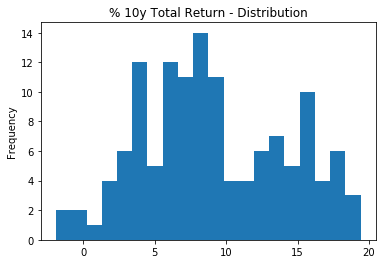

The mean of the distribution is: 9.10664191795518
The median of the distribution is: 8.261241442508727
Data range from -1.9113636572490433 to 19.406514089738014


In [31]:
tr_ty = year_df["% 10y Total Return"]
plt.hist(tr_ty, bins=20)
plt.gca().set(title="% 10y Total Return - Distribution", ylabel="Frequency")
plt.show()
mean = tr_ty.mean()
median = tr_ty.median()
min = tr_ty.min()
max = tr_ty.max()
print("The mean of the distribution is: {}".format(mean))
print("The median of the distribution is: {}".format(median))
print(f"Data range from {min} to {max}")

The distribution is bimodal. The mean is 9.10 and the median is 8.2. This means that a substantial part of the data are towards left and the distribution is right skewed. Most of the data are between 3 and 10. Values range from -1.9 to 19.4. We can see that in the long term the stock market grows and it is quite rare (but still possible!) to have negative returns in the long term.

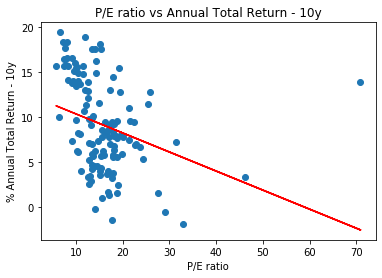

Coefficient of Determination(R2): 0.09876103055943686


In [32]:
plt.scatter(year_df["P/E ratio"], year_df["% 10y Total Return"])
plt.plot(year_df["P/E ratio"], regr.coef_[0]*year_df["P/E ratio"]+ regr.intercept_[0], 'r')
plt.xlabel("P/E ratio")
plt.ylabel("% Annualized Return - 10y")
plt.title("P/E ratio vs % Annualized Return - 10y")
plt.show()
print("Coefficient of Determination(R2): {}".format(regr.score(year_df[["P/E ratio"]], year_df[["% 10y Total Return"]])))

We can see that the model is not accurate. The P/E ratio is not the best metric. We can see that the coefficient of Determination is close to 0.1 which is not a good score. That's also because, like we said before, P/E ratio failed predicting one of the greatest bull markets in history after the Great Recession of 2008/2009. That happened because Earnings dropped and there was a lot of uncertainty in relation to the financial sector.Earnigns rebounded thanks to the FED that prints a lot of money (1.3 trillion USD) and bought financial assets from banks and from the Governament (Quantitative Easing).

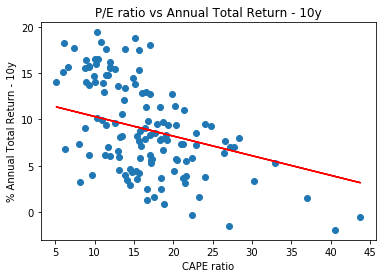

Coefficient of Determination(R2): 0.23507546915358124
The prediction, as of today, with a CAPE ratio of 31.1
Prediction: 5.8534199979446475


In [33]:
plt.scatter(year_df["CAPE ratio"], year_df["% 10y Total Return"])
plt.plot(year_df["CAPE ratio"], regr.coef_[0]*year_df["CAPE ratio"]+ regr.intercept_[0], 'r')
plt.xlabel("CAPE ratio")
plt.ylabel("% Annualized Return - 10y")
plt.title("P/E ratio vs % Annualized Return - 10y")
plt.show()
print("Coefficient of Determination(R2): {}".format(regr.score(year_df[["CAPE ratio"]], year_df[["% 10y Total Return"]])))
print("The prediction, as for today, with a CAPE ratio of 31.1")
print(f"Prediction: {regr.predict(np.array([[31.1]]))[0][0]}")

The CAPE ratio is, without any doubt, a better metrics to use in order to predict (at least trying) the market. We can use the prediction as a possible scenario and we have to consider a possible margin of error. What happened in the past doesn't predict the future: we do not know how the economic recovery from COVID-19 outbreak will be, maybe the FED can make the economy rebound or it might also fail. There's a possibility that the US market will not be as great as it has been until now. Maybe China will grow and surpass China as the world's leading power. Who knows.

To do a more precise prediction, we can try to calculate the returns of the next 10 years for each month.

In [34]:
df.head()

,Date,Price,Dividends,Earnings,Long Interest Rate GS10,CAPE ratio,P/E ratio,Year
0,1881-01-01,6.19,0.265,0.4858,3.7,18.474,12.7419,1881
1,1881-02-01,6.17,0.27,0.4817,3.69333,18.1473,12.8088,1881
2,1881-03-01,6.24,0.275,0.4775,3.68667,18.2701,13.0681,1881
3,1881-04-01,6.22,0.28,0.4733,3.68,17.9501,13.1418,1881
4,1881-05-01,6.5,0.285,0.4692,3.67333,18.8697,13.8534,1881


In [35]:
df["Dividends"] = df["Dividends"] / 12
df["Total Dividends"] = df["Dividends"].cumsum()

In [36]:
df["10y Annualized Return"] = ((((df["Price"].shift(-120) + (df["Total Dividends"].shift(-120) - df["Total Dividends"])) / df["Price"])) ** (1/10) - 1) * 100

In [37]:
df.dropna(inplace=True)

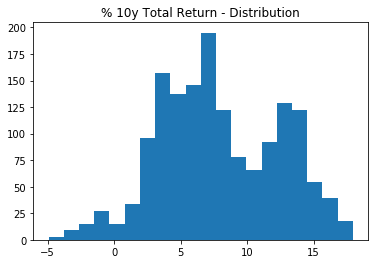

In [38]:
# sns.distplot(df["Total Next 10y Annualized Return"], kde=False).set_title("% 10y Annualized Return - Distribution")
# plt.show()
plt.hist(df["10y Annualized Return"], bins=20)
plt.gca().set(title="% 10y Total Return - Distribution")
plt.show()

The Average 10y Annual Return is 7.4% with a standard deviation of 4.4. Most of the values are between 3% and 13%
Over the long term the market returns have been positive, except for some outliers. This doesn't mean that the market return is guaranteed over the long term because: 1) Past performances might not repeat again and 2) We are considering nominal returns, not real returns.

In [41]:
regr = linear_model.LinearRegression()
regr.fit(df[["CAPE ratio"]], df[["10y Annualized Return"]])
m = regr.coef_
q = regr.intercept_

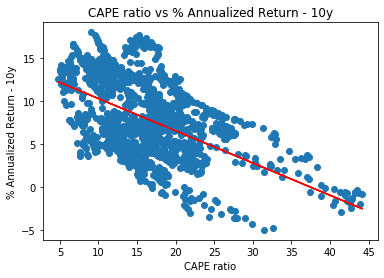

Coefficient of Determination(R2): 0.29735678097653706


In [46]:
plt.scatter(df["CAPE ratio"], df["10y Annualized Return"])
plt.plot(df["CAPE ratio"], m[0]*df["CAPE ratio"] + q[0], "r")
plt.xlabel("CAPE ratio")
plt.ylabel("% Annualized Return - 10y")
plt.title("CAPE ratio vs % Annualized Return - 10y")
plt.show()

print("Coefficient of Determination(R2): {}".format(regr.score(df[["CAPE ratio"]], df[["10y Annualized Return"]])))

The regression line fits the data with an R2 of approximately 0.3. We can try to predict the return for the next 10 years based on this model. As for today (01/02/2021) the CAPE is 33.74. 

In [49]:
print("The prediction, as for today, with a CAPE ratio of 31.1")
print(f"Prediction: {regr.predict(np.array([[33.74]]))[0][0]}%")

The prediction, as for today, with a CAPE ratio of 31.1
Prediction: 1.404580760218499%


As you can see, the return for the next 10 will be very low. With a possible high inflation, real returns could also be negative. 
A scenario of low return is not far from the reality. In the recent 10 years the market has risen a lot and valuation are high. Are we close to another lost decade? We cannot know, we have to be ready with our portfolios by diversification in different asset classes, countries and currencies.